# EDA -> 01

## Title: Bike Details Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# can import dataset from google drive directly withdownloading the dataset
# and in all the EDA's i have importes this way..
df_1 = pd.read_csv('https://drive.google.com/uc?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3')
df_1_copy = df_1.copy()

In [3]:
df_1.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [5]:
df_1=df_1.drop_duplicates()

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1055 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1055 non-null   object 
 1   selling_price      1055 non-null   int64  
 2   year               1055 non-null   int64  
 3   seller_type        1055 non-null   object 
 4   owner              1055 non-null   object 
 5   km_driven          1055 non-null   int64  
 6   ex_showroom_price  622 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 65.9+ KB


### Q.1. What is the range of selling prices in the dataset?

In [7]:
max_value = df_1['selling_price'].max()
print(f"Maximum price : {max_value}")

min_value = df_1['selling_price'].min()
print(f"Minimum price : {min_value}")

selling_price_range = max_value - min_value
print(f"Range for Selling Price : {selling_price_range}")

Maximum price : 760000
Minimum price : 5000
Range for Selling Price : 755000


### Q.2. What is the median selling price for bikes in the dataset?

In [8]:
median = df_1['selling_price'].median()
print(f"Median for Selling Price: {median}")

Median for Selling Price: 45000.0


### Q.3. What is the most common seller type?

In [9]:
df_1.seller_type.value_counts()

seller_type
Individual    1049
Dealer           6
Name: count, dtype: int64

--> Thus, most common seller type is Individual with a count of 1049

### Q.4. How many bikes have driven more than 50,000 kilometers?

In [10]:
df_1.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [11]:
more_than_50k = df_1[df_1['km_driven'] > 50000]

In [12]:
more_than_50k.count()

name                 168
selling_price        168
year                 168
seller_type          168
owner                168
km_driven            168
ex_showroom_price     86
dtype: int64

--> Thus, 168 bikes have driven more than 50,000 kilometers.

### Q.5. What is the average km_driven value for each ownership type?

In [13]:
df_1['owner'].value_counts()

owner
1st owner    918
2nd owner    123
3rd owner     11
4th owner      3
Name: count, dtype: int64

In [14]:
first_owner_avg_km_driven = df_1[df_1['owner']=='1st owner']['km_driven'].mean()
second_owner_avg_km_driven = df_1[df_1['owner']=='2nd owner']['km_driven'].mean()
third_owner_avg_km_driven = df_1[df_1['owner']=='3rd owner']['km_driven'].mean()
fourth_owner_avg_km_driven = df_1[df_1['owner']=='4th owner']['km_driven'].mean()

n = 1
lst = [first_owner_avg_km_driven, second_owner_avg_km_driven, third_owner_avg_km_driven, fourth_owner_avg_km_driven]
while n <= 4:
    print(f"{n}_owner have driven {round(lst[n-1],2)}km on average.")
    n += 1

1_owner have driven 32732.71km on average.
2_owner have driven 39288.99km on average.
3_owner have driven 33292.18km on average.
4_owner have driven 311500.0km on average.


### Q.6. What proportion of bikes are from the year 2015 or older?

In [15]:
df_1.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [16]:
df_1['year'].info()

<class 'pandas.core.series.Series'>
Index: 1055 entries, 0 to 1060
Series name: year
Non-Null Count  Dtype
--------------  -----
1055 non-null   int64
dtypes: int64(1)
memory usage: 16.5 KB


In [17]:
older = df_1[df_1['year'] <= 2015]['year'].value_counts().sum()
older

np.int64(597)

In [18]:
all_in_total = df_1['year'].value_counts().sum()
all_in_total

np.int64(1055)

In [19]:
proportion = (older/all_in_total) * 100
round(proportion, 2)

np.float64(56.59)

--> About 56.59% of bikes are from the year 2015 or older.

### Q.7. What is the trend of missing values across the dataset?

In [20]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1055 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1055 non-null   object 
 1   selling_price      1055 non-null   int64  
 2   year               1055 non-null   int64  
 3   seller_type        1055 non-null   object 
 4   owner              1055 non-null   object 
 5   km_driven          1055 non-null   int64  
 6   ex_showroom_price  622 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 65.9+ KB


In [21]:
df_1.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [22]:
for col in df_1.columns:
    na_count = df_1[col].isna().sum()
    print(f"{col} --> has {na_count} data N/A")

name --> has 0 data N/A
selling_price --> has 0 data N/A
year --> has 0 data N/A
seller_type --> has 0 data N/A
owner --> has 0 data N/A
km_driven --> has 0 data N/A
ex_showroom_price --> has 433 data N/A


### Q.8. What is the highest ex_showroom_price recorded, and for which bike?

In [23]:
df_1.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [24]:
df_1[df_1['ex_showroom_price']==df_1['ex_showroom_price'].max()]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


--> "Harley-Davidson Street Bob" of 2013 has a maximum ex showroom price

### Q.9. What is the total number of bikes listed by each seller type?

In [25]:
df_1['seller_type'].value_counts()

seller_type
Individual    1049
Dealer           6
Name: count, dtype: int64

--> Total number of bikes listed by each seller type

Individual: 1049

Dealer: 6

### Q.10. What is the relationship between selling_price and km_driven for first-owner bikes?

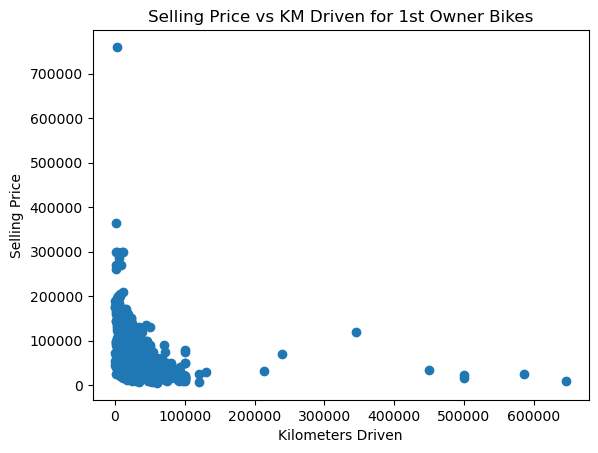

Correlation (selling_price vs km_driven) for 1st-owner bikes --> -0.24


In [26]:
first_owner = df_1[df_1['owner'].str.contains("1st", case=False, na=False)]

plt.scatter(first_owner['km_driven'], first_owner['selling_price'])
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.title("Selling Price vs KM Driven for 1st Owner Bikes")
plt.show()

corr = first_owner[['selling_price','km_driven']].corr().iloc[0,1]
print("Correlation (selling_price vs km_driven) for 1st-owner bikes -->", round(corr,2))


### Q.11. Identify and remove outliers in the km_driven column using the IQR method.

In [27]:
df_1.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [28]:
df_1.shape

(1055, 7)

In [29]:
Q1 = df_1['km_driven'].quantile(0.25)
Q3 = df_1['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

outliers = df_1[(df_1['km_driven'] < lower_bound) | (df_1['km_driven'] > upper_bound)]
print("Outliers count:", outliers.shape[0])

df_1_no_outliers = df_1[(df_1['km_driven'] >= lower_bound) & (df_1['km_driven'] <= upper_bound)]
print("Shape after removing outliers:", df_1_no_outliers.shape)

Lower bound: -30750.0
Upper bound: 87250.0
Outliers count: 38
Shape after removing outliers: (1017, 7)


### Q.12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

In [30]:
df_1.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


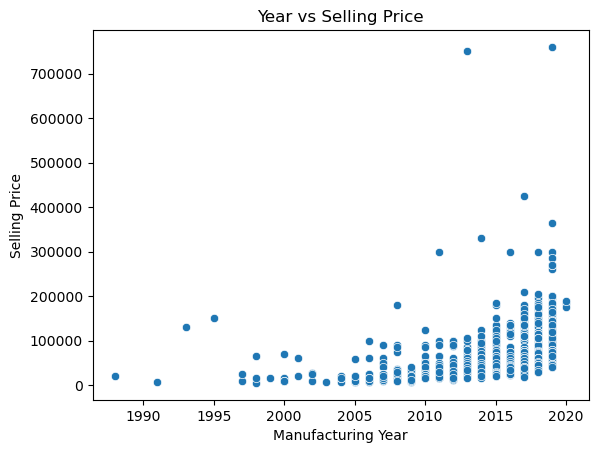

In [31]:
sns.scatterplot(x= df_1['year'], y= df_1['selling_price'])
plt.xlabel("Manufacturing Year")
plt.ylabel("Selling Price")
plt.title("Year vs Selling Price")
plt.show()

### Q.13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

age
5    -34260.000000
6      2954.562500
7     13023.194805
8     22360.690476
9     28328.190476
10    28013.275000
11    34505.606061
12    43227.673077
13    37317.648649
14    47102.666667
15    45698.555556
16    39070.923077
17    54732.428571
18    42399.000000
19    39664.500000
20    44852.000000
21    36852.000000
24    34852.000000
Name: depreciation, dtype: float64


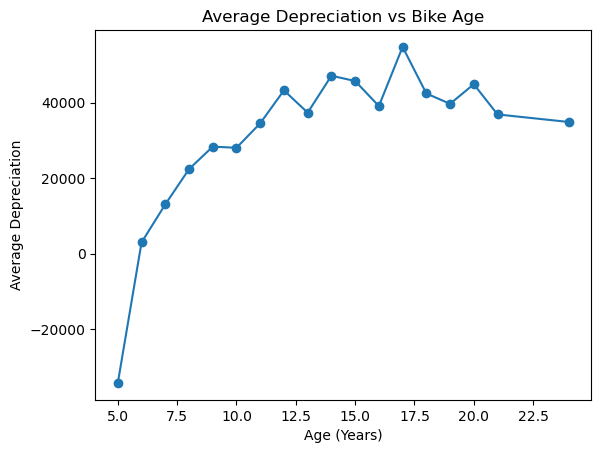

In [32]:

current_year = 2025
df_1['age'] = current_year - df_1['year']

# Since ex-shoowroom price has a lot of N/A values, thus creating a new data frame for this process
valid_dep = df_1.dropna(subset=['ex_showroom_price'])

valid_dep['depreciation'] = valid_dep['ex_showroom_price'] - valid_dep['selling_price']

avg_dep_by_age = valid_dep.groupby('age')['depreciation'].mean().sort_index()

print(avg_dep_by_age)


plt.plot(avg_dep_by_age.index, avg_dep_by_age.values, marker='o')
plt.xlabel("Age (Years)")
plt.ylabel("Average Depreciation")
plt.title("Average Depreciation vs Bike Age")
plt.show()


### Q.14. Which bike names are priced significantly above the average price for their manufacturing year?

In [33]:
df_1.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,6
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,8
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,7
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,10
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,14


In [34]:
avg_price_per_year = df_1.groupby('year')['selling_price'].mean()

df_1['mean_price_year'] = df_1['year'].map(avg_price_per_year)

df_1['pct_above_year_mean'] = (df_1['selling_price'] - df_1['mean_price_year']) / df_1['mean_price_year']

expensive_bike = df_1[df_1['selling_price'] > 0.00].sort_values('pct_above_year_mean', ascending=False)

print(expensive_bike[['name','year','selling_price']].head(20))

                                     name  year  selling_price
134            Harley-Davidson Street Bob  2013         750000
860        Kawasaki Ninja 650 [2018-2019]  2011         300000
311            Harley-Davidson Street 750  2014         330000
295                       Suzuki GSX S750  2019         760000
289        Kawasaki Ninja 650 [2018-2019]  2017         425000
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000
897                    Kawasaki Ninja 300  2016         300000
776             Royal Enfield Electra 5 S  2006          99000
291                   Kawasaki Ninja 250R  2010         125000
224  Royal Enfield Bullet 350 [2007-2011]  2007          90000
889         Royal Enfield Thunderbird 350  2005          59000
344                            BMW G310GS  2018         300000
306                             Yamaha Rx  2000          70000
890          Royal Enfield Classic Chrome  2015         185000
411          KTM 390 Duke ABS [2013-2016]  2015        

### Q.15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

In [35]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1055 entries, 0 to 1060
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1055 non-null   object 
 1   selling_price        1055 non-null   int64  
 2   year                 1055 non-null   int64  
 3   seller_type          1055 non-null   object 
 4   owner                1055 non-null   object 
 5   km_driven            1055 non-null   int64  
 6   ex_showroom_price    622 non-null    float64
 7   age                  1055 non-null   int64  
 8   mean_price_year      1055 non-null   float64
 9   pct_above_year_mean  1055 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 90.7+ KB


In [36]:
df_1.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price', 'age', 'mean_price_year', 'pct_above_year_mean'],
      dtype='object')

                   selling_price  km_driven  ex_showroom_price       age
selling_price           1.000000  -0.212005           0.918659 -0.400947
km_driven              -0.212005   1.000000          -0.120752  0.287227
ex_showroom_price       0.918659  -0.120752           1.000000 -0.124832
age                    -0.400947   0.287227          -0.124832  1.000000


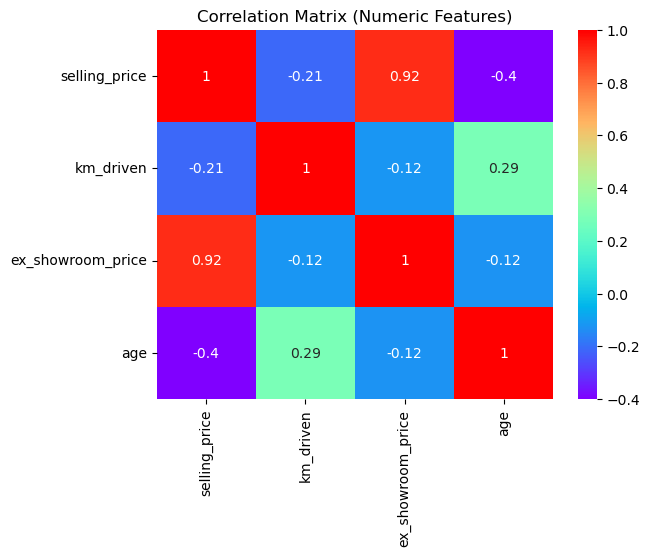

In [37]:
numeric_cols = df_1[['selling_price', 'km_driven','ex_showroom_price', 'age']]

corr_matrix = numeric_cols.corr()
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap="rainbow")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

# "THIS IS END OF THIS EDA -> 01 ASSIGNMENT"